In [13]:
import pandas as pd
import numpy as np

In [2]:
#Lecture de la base des donn√©es
df = pd.read_csv("df_final_dubai.csv")

# STATISTIQUES DESCRIPTIVES

In [3]:
df.head()

Date  MAX_TEMPERATURE_C  MIN_TEMPERATURE_C  TEMP_MOY  \
0  2024-01-01                 25                 23     23.75   
1  2024-01-02                 24                 22     23.25   
2  2024-01-03                 24                 21     22.25   
3  2024-01-04                 24                 22     23.25   
4  2024-01-05                 23                 21     21.75   

   HUMIDITY_MAX_PERCENT  HUMIDITY_EST_AVG  WINDSPEED_MAX_KMH  \
0                    71             53.25                 19   
1                    67             50.25                 28   
2                    63             47.25                 21   
3                    67             50.25                 37   
4                    60             45.00                 18   

   WINDSPEED_AVG_KMH  PRECIP_TOTAL_DAY_MM  SUNHOUR  ...  PRESSURE_MAX_MB  \
0               11.4                  0.0       10  ...             1018   
1               16.8                  0.0       10  ...             1018   
2               12.6                  0.0        9  ...             1017   
3               22.2                  0.0       10  ...             1017   
4               10.8                  0.0       10  ...             1017   

   CLOUDCOVER_AVG_PERCENT          CO        NO2        SO2         O3  \
0                   9.625  269.666667  16.775000   9.058333  83.083333   
1                  12.750  252.250000  14.841667   6.883333  87.250000   
2                  25.375  250.916667  17.187500   8.200000  80.541667   
3                  32.875  200.083333   9.270833   4.316667  86.916667   
4                   5.750  309.083333  25.420833  12.220833  77.916667   

       PM2.5       PM10        AQI   City  
0  25.158333  68.591667  64.993683  Dubai  
1  25.850000  64.383333  69.502499  Dubai  
2  23.575000  64.666667  59.740902  Dubai  
3  19.691667  46.479167  65.627639  Dubai  
4  26.054167  51.237500  52.790759  Dubai  

[5 rows x 21 columns]

In [4]:
df.describe()

MAX_TEMPERATURE_C  MIN_TEMPERATURE_C    TEMP_MOY  HUMIDITY_MAX_PERCENT  \
count         366.000000         366.000000  366.000000            366.000000   
mean           30.956284          26.103825   28.172814             60.598361   
std             5.864521           4.864198    5.206393              9.944773   
min            20.000000          17.000000   18.750000             36.000000   
25%            25.000000          21.000000   23.000000             54.000000   
50%            31.000000          26.000000   28.625000             60.000000   
75%            36.000000          31.000000   33.250000             67.000000   
max            42.000000          34.000000   36.750000             92.000000   

       HUMIDITY_EST_AVG  WINDSPEED_MAX_KMH  WINDSPEED_AVG_KMH  \
count         366.00000         366.000000         366.000000   
mean           45.44877          21.696721          13.018033   
std             7.45858           5.795448           3.477269   
min            27.00000           9.000000           5.400000   
25%            40.50000          18.000000          10.800000   
50%            45.00000          21.000000          12.600000   
75%            50.25000          25.000000          15.000000   
max            69.00000          41.000000          24.600000   

       PRECIP_TOTAL_DAY_MM     SUNHOUR  SR_EST_W_m2  PRESSURE_MAX_MB  \
count           366.000000  366.000000   366.000000       366.000000   
mean              0.144536   11.879781  1781.967213      1009.718579   
std               1.602536    1.659106   248.865831         7.989379   
min               0.000000    2.000000   300.000000       993.000000   
25%               0.000000   11.000000  1650.000000      1003.000000   
50%               0.000000   12.000000  1800.000000      1011.000000   
75%               0.000000   13.000000  1950.000000      1016.750000   
max              29.500000   14.000000  2100.000000      1024.000000   

       CLOUDCOVER_AVG_PERCENT           CO         NO2         SO2  \
count              366.000000   366.000000  366.000000  366.000000   
mean                 8.191257   440.464026   39.488297   20.308971   
std                 12.765182   124.290300   16.864561    7.917554   
min                  0.000000   200.083333    8.775000    4.316667   
25%                  0.156250   346.354167   27.672917   15.086458   
50%                  3.250000   434.416667   38.150000   20.333333   
75%                  9.906250   519.927083   48.171875   25.414583   
max                 92.375000  1012.750000  113.358333   53.775000   

               O3       PM2.5        PM10         AQI  
count  366.000000  366.000000  366.000000  366.000000  
mean    93.878415   41.574146  111.040619   85.113722  
std     36.922825   14.593006   65.267470   25.554694  
min     15.916667   12.087500   18.508333   40.561111  
25%     66.677083   30.313542   63.401042   67.222812  
50%     86.666667   40.427083   91.708333   78.422812  
75%    116.479167   51.193750  143.017708   98.414063  
max    210.583333   98.437500  374.762500  191.291810

In [5]:
df.isnull().sum()


Date                      0
MAX_TEMPERATURE_C         0
MIN_TEMPERATURE_C         0
TEMP_MOY                  0
HUMIDITY_MAX_PERCENT      0
HUMIDITY_EST_AVG          0
WINDSPEED_MAX_KMH         0
WINDSPEED_AVG_KMH         0
PRECIP_TOTAL_DAY_MM       0
SUNHOUR                   0
SR_EST_W_m2               0
PRESSURE_MAX_MB           0
CLOUDCOVER_AVG_PERCENT    0
CO                        0
NO2                       0
SO2                       0
O3                        0
PM2.5                     0
PM10                      0
AQI                       0
City                      0
dtype: int64

## Outliers

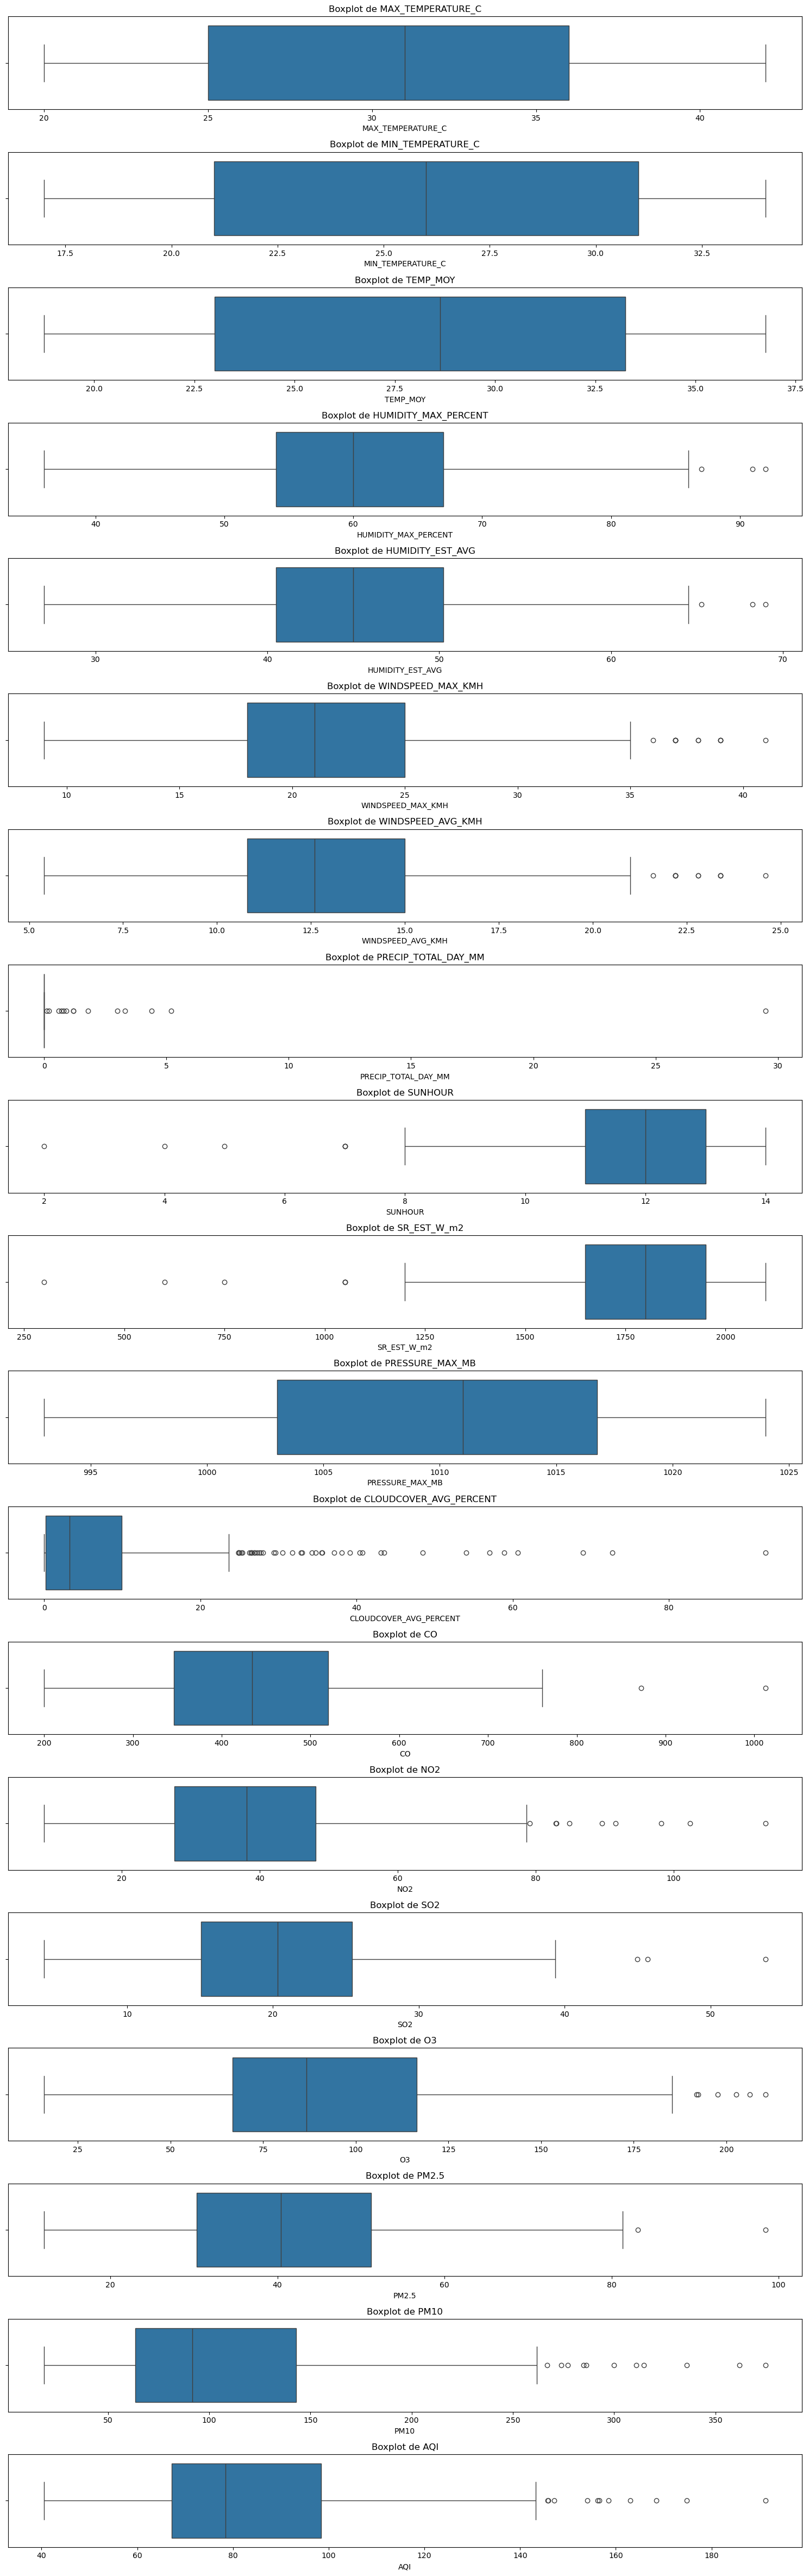

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# S√©lection des colonnes num√©riques
numeric_cols = df.select_dtypes(include=['number']).columns

# D√©finir la taille de la figure pour les boxplots
plt.figure(figsize=(15, len(numeric_cols) * 2.5))

# G√©n√©rer les boxplots
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=df[col], orient='h')
    plt.title(f'Boxplot de {col}')
    plt.tight_layout()

plt.show()

#### Traitement des valeurs extr√™mes (outliers)
Dans cette √©tude, les valeurs extr√™mes pr√©sentes dans les donn√©es n‚Äôont pas √©t√© supprim√©es ni imput√©es. Cette d√©cision repose sur le fait que, dans le contexte de la qualit√© de l‚Äôair, les outliers peuvent repr√©senter des √©v√©nements environnementaux r√©els et significatifs tels que des pics de pollution li√©s √† des conditions m√©t√©orologiques particuli√®res, des √©pisodes de trafic intense ou d'autres incidents ponctuels. Les exclure reviendrait √† ignorer des signaux critiques dans l‚Äôanalyse. Afin de pr√©server l‚Äôint√©grit√© des donn√©es et de refl√©ter fid√®lement leur variabilit√© naturelle, nous avons opt√© pour l‚Äôutilisation de mod√®les robustes (notamment la r√©gression avec norme de Huber) qui permettent de limiter l‚Äôimpact des valeurs extr√™mes sans pour autant les √©carter. Ce choix vise √† assurer √† la fois la validit√© scientifique de l‚Äôanalyse et la pertinence op√©rationnelle des r√©sultats, notamment pour la d√©tection et l‚Äôinterpr√©tation des √©pisodes de pollution atypiques.


## Distribution des variables

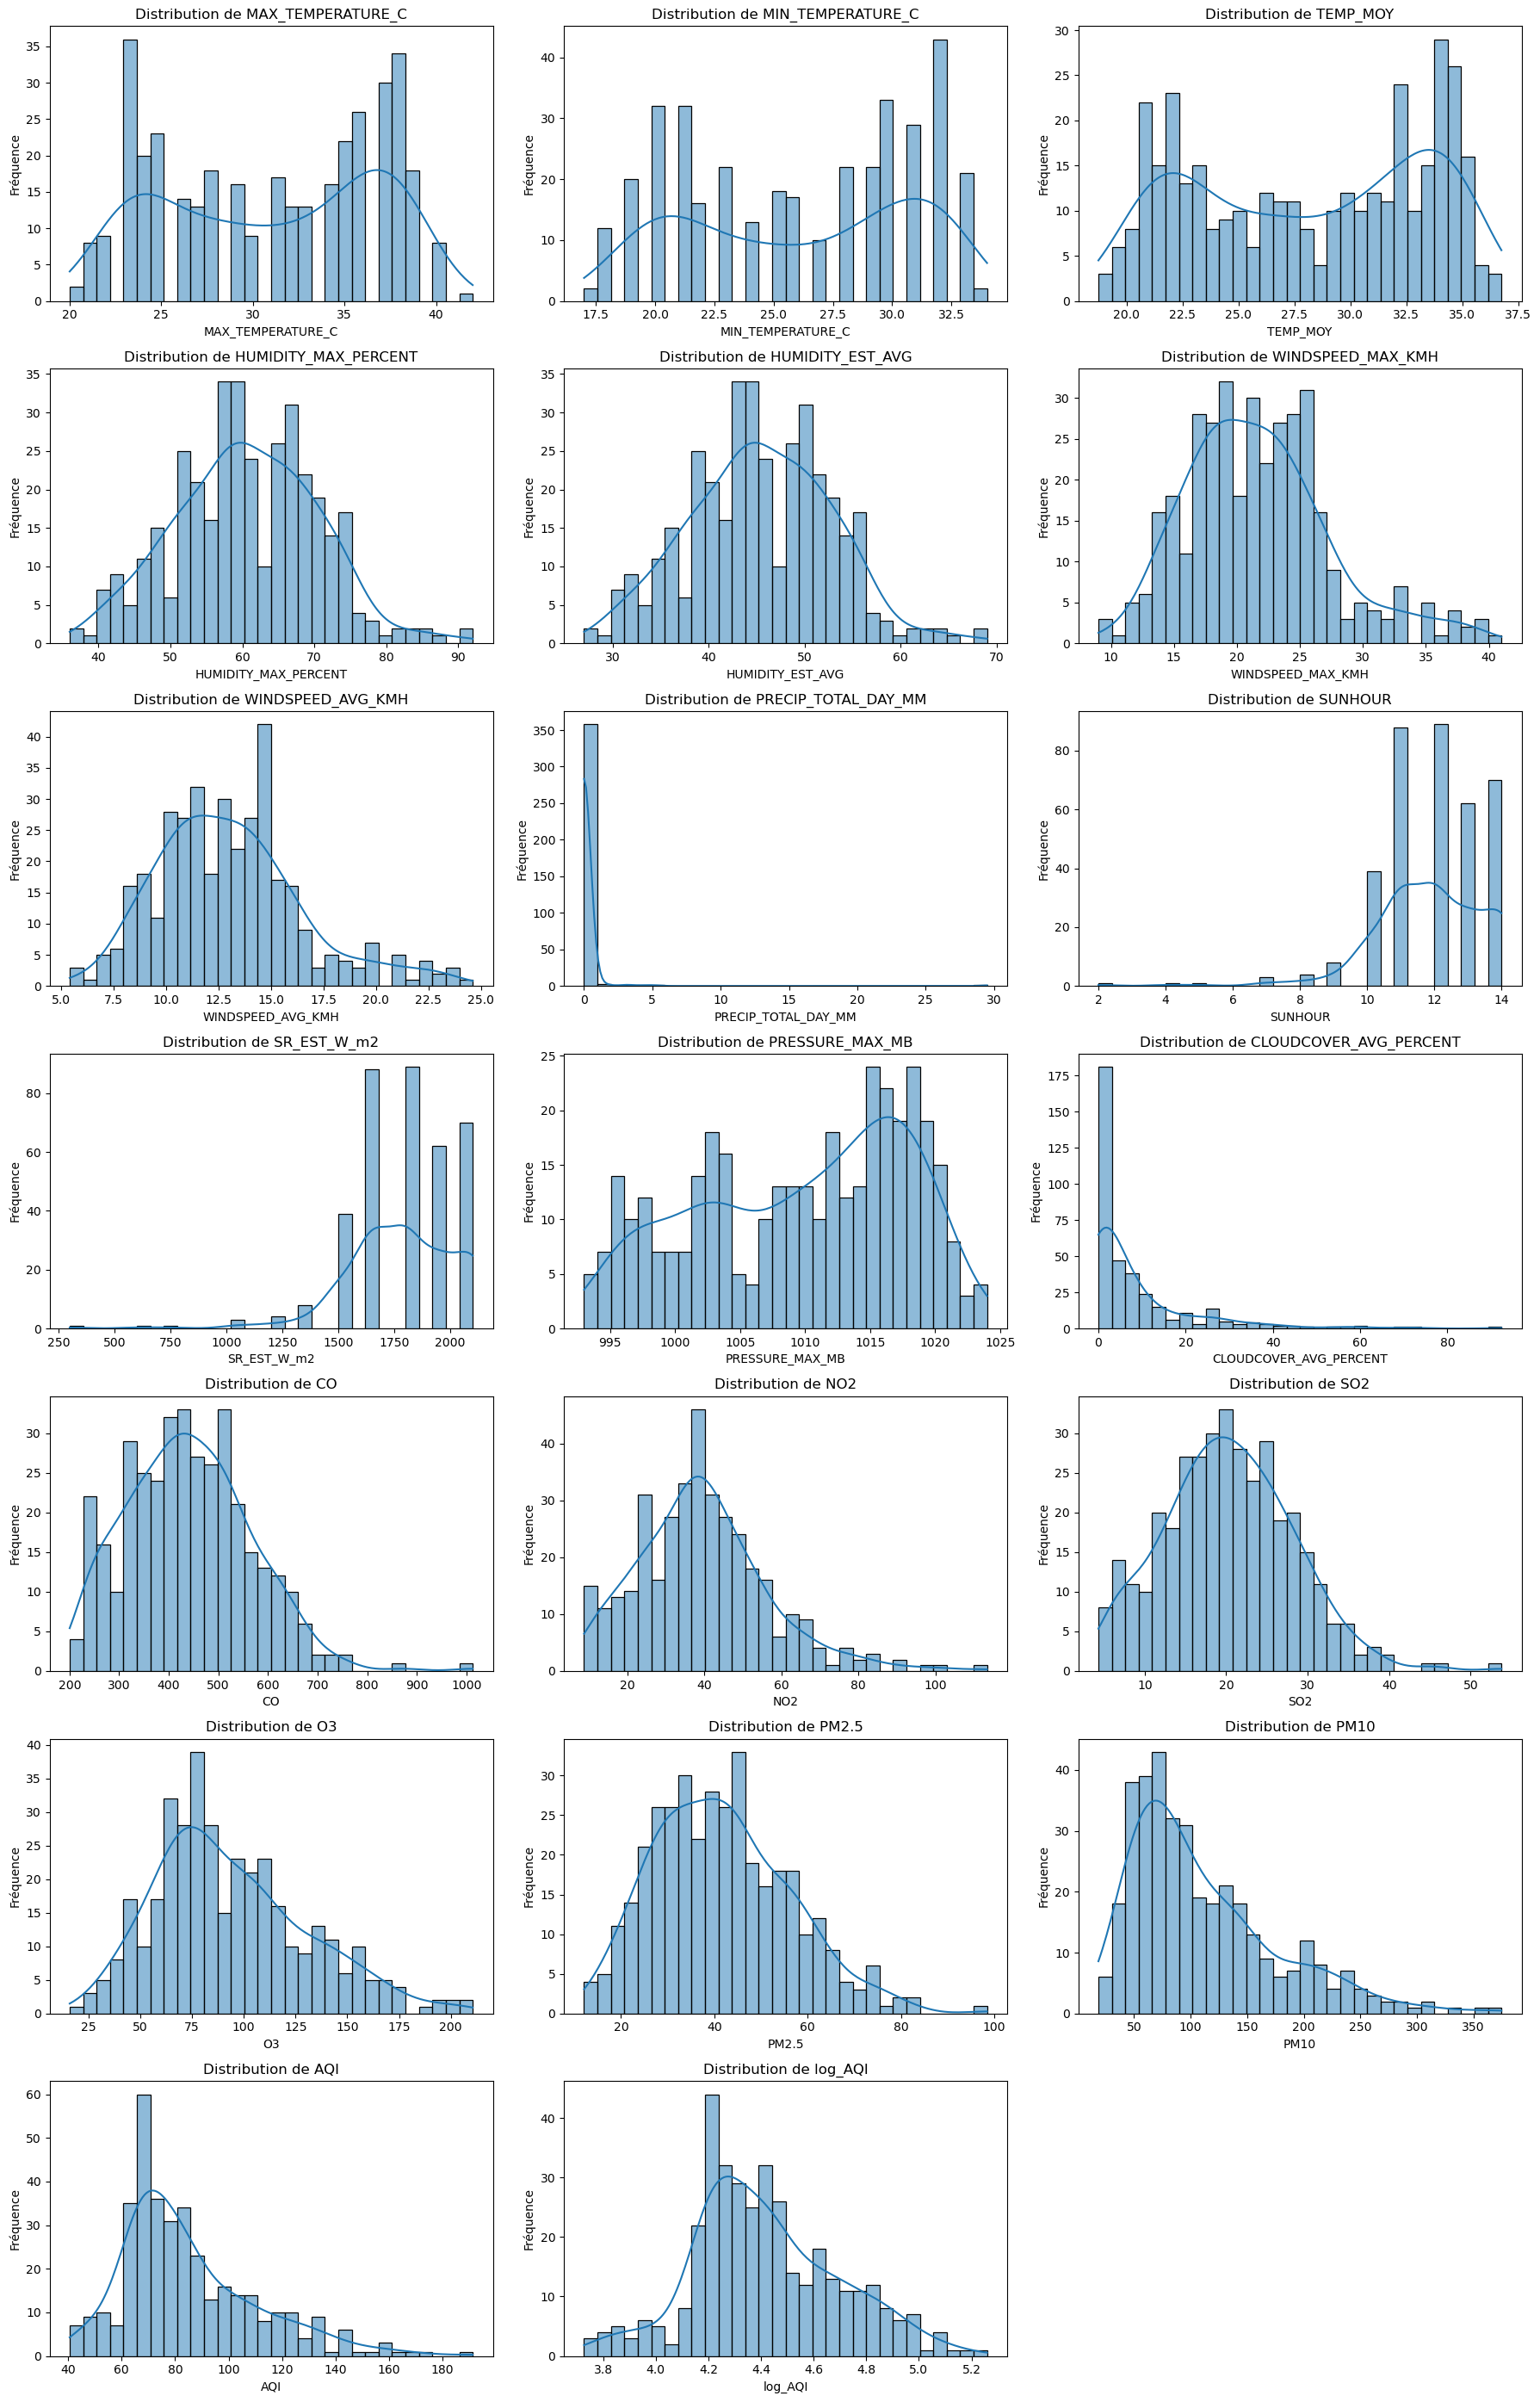

In [14]:
numeric_columns = df.select_dtypes(include=np.number).columns

# D√©finir la taille de la figure
n_cols = 3
n_rows = int(np.ceil(len(numeric_columns) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

# Cr√©er un histogramme avec courbe de densit√© pour chaque variable
for i, col in enumerate(numeric_columns):
    sns.histplot(df[col], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f'Distribution de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Fr√©quence')

# Supprimer les axes vides si le nombre de variables < nombre de sous-graphiques
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Corr√©lation entre les variables

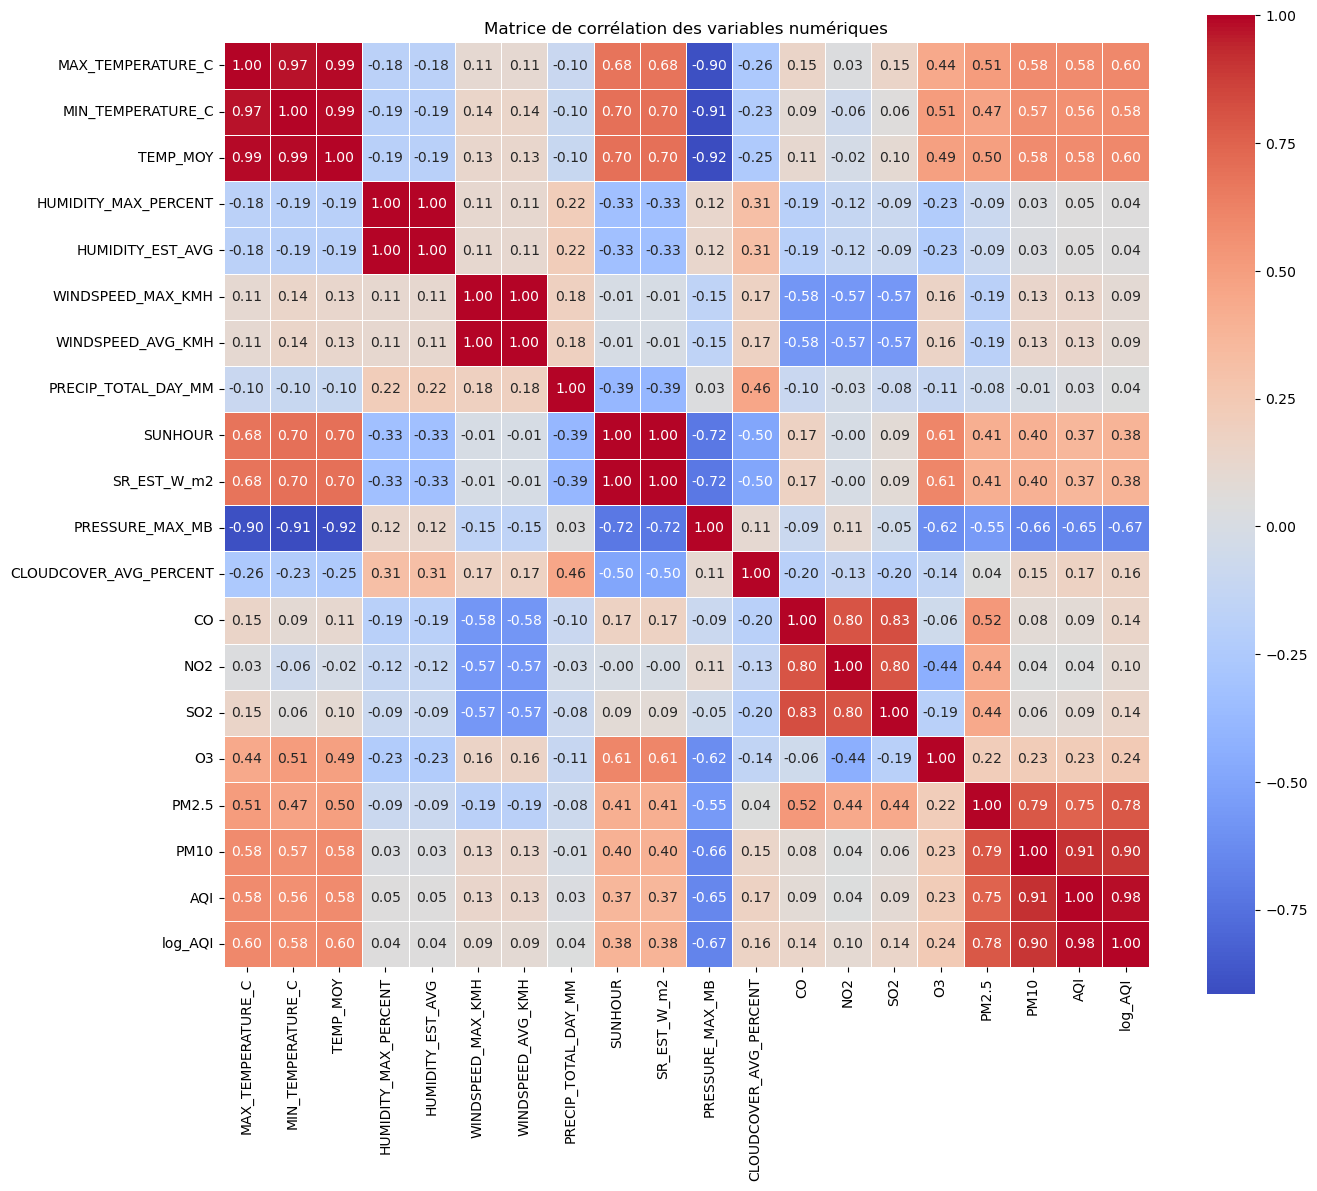

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de corr√©lation
correlation_matrix = df.corr(numeric_only=True)

# D√©finir la taille de la figure
plt.figure(figsize=(14, 12))

# Cr√©er une heatmap avec annotations
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)

plt.title("Matrice de corr√©lation des variables num√©riques")
plt.tight_layout()
plt.show()


In [9]:
# Transformation de la variable cible (log AQI)
df['log_AQI'] = np.log(df['AQI'] + 1)


In [10]:
print(df.columns)

Index(['Date', 'MAX_TEMPERATURE_C', 'MIN_TEMPERATURE_C', 'TEMP_MOY',
       'HUMIDITY_MAX_PERCENT', 'HUMIDITY_EST_AVG', 'WINDSPEED_MAX_KMH',
       'WINDSPEED_AVG_KMH', 'PRECIP_TOTAL_DAY_MM', 'SUNHOUR', 'SR_EST_W_m2',
       'PRESSURE_MAX_MB', 'CLOUDCOVER_AVG_PERCENT', 'CO', 'NO2', 'SO2', 'O3',
       'PM2.5', 'PM10', 'AQI', 'City', 'log_AQI'],
      dtype='object')


In [11]:
df['log_AQI'] = df['log_AQI'].astype(float)

## Corr√©lations entre AQI et les autres variables

In [16]:
# Corr√©lations avec AQI uniquement (tri√©es)
corr_with_aqi = correlation_matrix[['log_AQI']].sort_values(by='log_AQI', ascending=False)

# Identification des couples de variables tr√®s fortement corr√©l√©es (> 0.8), en excluant la diagonale
high_corr_pairs = []
threshold = 0.8
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        var1 = correlation_matrix.columns[i]
        var2 = correlation_matrix.columns[j]
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > threshold:
            high_corr_pairs.append((var1, var2, corr_value))

# Conversion en DataFrame pour affichage
high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Variable 1', 'Variable 2', 'Corr√©lation'])

print("Corr√©lations avec log_AQI (tri√©es) :")
print(corr_with_aqi)

print("\nPaires de variables tr√®s fortement corr√©l√©es (> 0.8) :")#ce sont des cas potentiels de multicolin√©arit√©, √† surveiller dans les mod√®les lin√©aires.
print(high_corr_df)

Corr√©lations avec log_AQI (tri√©es) :
                         log_AQI
log_AQI                 1.000000
AQI                     0.982281
PM10                    0.895832
PM2.5                   0.783474
MAX_TEMPERATURE_C       0.601063
TEMP_MOY                0.599057
MIN_TEMPERATURE_C       0.579316
SUNHOUR                 0.384859
SR_EST_W_m2             0.384859
O3                      0.237639
CLOUDCOVER_AVG_PERCENT  0.164628
CO                      0.141650
SO2                     0.140435
NO2                     0.097733
WINDSPEED_AVG_KMH       0.087750
WINDSPEED_MAX_KMH       0.087750
HUMIDITY_EST_AVG        0.043023
HUMIDITY_MAX_PERCENT    0.043023
PRECIP_TOTAL_DAY_MM     0.036293
PRESSURE_MAX_MB        -0.666732

Paires de variables tr√®s fortement corr√©l√©es (> 0.8) :
              Variable 1         Variable 2  Corr√©lation
0      MAX_TEMPERATURE_C  MIN_TEMPERATURE_C     0.970381
1      MAX_TEMPERATURE_C           TEMP_MOY     0.990464
2      MAX_TEMPERATURE_C    PRESSURE_

In [18]:
# Conversion de la date au bon format
df['Date'] = pd.to_datetime(df['Date'])
# Cr√©ation des variables temporelles
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['weekday'] = df['Date'].dt.weekday
df['week'] = df['Date'].dt.isocalendar().week
df['year'] = df['Date'].dt.year
df['TimeIndex'] = np.arange(len(df))

# Optionnel : ajouter une variable "saison"
def get_season_dubai(month):
    if month in [12, 1, 2, 3]:
        return 'hiver'
    elif month in [5, 6, 7, 8, 9]:
        return '√©t√©'
    else:  # avril, octobre, novembre
        return 'transition'

df['saison'] = df['month'].apply(get_season_dubai)
df = pd.get_dummies(df, columns=['saison'], drop_first=True)

In [19]:
df.head()

Date  MAX_TEMPERATURE_C  MIN_TEMPERATURE_C  TEMP_MOY  \
0 2024-01-01                 25                 23     23.75   
1 2024-01-02                 24                 22     23.25   
2 2024-01-03                 24                 21     22.25   
3 2024-01-04                 24                 22     23.25   
4 2024-01-05                 23                 21     21.75   

   HUMIDITY_MAX_PERCENT  HUMIDITY_EST_AVG  WINDSPEED_MAX_KMH  \
0                    71             53.25                 19   
1                    67             50.25                 28   
2                    63             47.25                 21   
3                    67             50.25                 37   
4                    60             45.00                 18   

   WINDSPEED_AVG_KMH  PRECIP_TOTAL_DAY_MM  SUNHOUR  ...   City   log_AQI  day  \
0               11.4                  0.0       10  ...  Dubai  4.189559    1   
1               16.8                  0.0       10  ...  Dubai  4.255648    2   
2               12.6                  0.0        9  ...  Dubai  4.106617    3   
3               22.2                  0.0       10  ...  Dubai  4.199119    4   
4               10.8                  0.0       10  ...  Dubai  3.985102    5   

   month  weekday  week  year  TimeIndex  saison_transition  saison_√©t√©  
0      1        0     1  2024          0              False       False  
1      1        1     1  2024          1              False       False  
2      1        2     1  2024          2              False       False  
3      1        3     1  2024          3              False       False  
4      1        4     1  2024          4              False       False  

[5 rows x 30 columns]

# ECONOMETRIE

In [20]:
# üì¶ Importation des biblioth√®ques n√©cessaires
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.robust.robust_linear_model import RLM
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan, normal_ad

In [26]:
import statsmodels.api as sm
from statsmodels.robust.norms import HuberT
# S√©lection des variables explicatives
# ‚úÖ Variables explicatives s√©lectionn√©es selon la litt√©rature et la corr√©lation avec log_AQI
features = [
    'PM2.5',                    # Particules fines ‚Äì tr√®s fortement li√©es √† AQI
    'CO',                       # Monoxyde de carbone
    #'NO2',                      # Dioxyde d‚Äôazote
    'SO2',                      # Dioxyde de soufre
    #'Benz√®ne',                  # Compos√© organique volatil (COV canc√©rog√®ne)‚Äì mod√©r√©ment corr√©l√©
    'O3',                       # Ozone ‚Äì relation complexe mais important pour la chimie atmosph√©rique
    #'Tolu√®ne',                  # COV souvent utilis√© en interaction

    # Variables m√©t√©orologiques de contr√¥le
    'TEMP_MOY',                 # Temp√©rature moyenne
    'WINDSPEED_AVG_KMH',         # Vitesse moyenne du vent
    'PRECIP_TOTAL_DAY_MM',     # Pr√©cipitations
    'CLOUDCOVER_AVG_PERCENT',   # Couverture nuageuse
    'month', 
    'weekday', 
    #'TimeIndex'
]
X = df[features]
X = X.loc[:, ~X.columns.duplicated()]  # Supprimer les colonnes dupliqu√©es
X = sm.add_constant(X)
y = df['log_AQI']

# Mod√®le OLS classique avec toutes les variables
model_ols = sm.OLS(y, X).fit()

# Afficher les r√©sultats
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                log_AQI   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     122.5
Date:                Sat, 12 Jul 2025   Prob (F-statistic):          1.33e-108
Time:                        16:50:14   Log-Likelihood:                 220.52
No. Observations:                 366   AIC:                            -419.0
Df Residuals:                     355   BIC:                            -376.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      3


‚úÖ R√âSUM√â DU MOD√àLE
                            OLS Regression Results                            
Dep. Variable:                log_AQI   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     122.5
Date:                Sat, 12 Jul 2025   Prob (F-statistic):          1.33e-108
Time:                        16:50:17   Log-Likelihood:                 220.52
No. Observations:                 366   AIC:                            -419.0
Df Residuals:                     355   BIC:                            -376.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
con

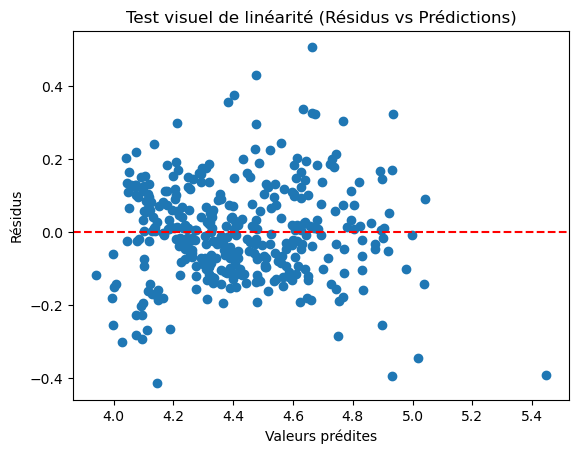


üìä Homosc√©dasticit√© - Test de Breusch-Pagan
LM statistic : 20.409, p-value : 0.0256

üìä Normalit√© des r√©sidus
Shapiro-Wilk p-value : 0.0073
Jarque-Bera p-value : 0.0005

üìä Ind√©pendance des erreurs - Durbin-Watson
Durbin-Watson statistic : 1.311 (id√©al proche de 2)

üìä VIF - Facteurs d'inflation de la variance
                  Variable        VIF
0                    const  92.851693
1                    PM2.5   2.277162
2                       CO   4.442861
3                      SO2   4.802352
4                       O3   1.500061
5                 TEMP_MOY   2.239586
6        WINDSPEED_AVG_KMH   1.746261
7      PRECIP_TOTAL_DAY_MM   1.337931
8   CLOUDCOVER_AVG_PERCENT   1.636035
9                    month   1.637105
10                 weekday   1.016229


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from statsmodels.api import OLS, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson, jarque_bera
from scipy.stats import shapiro

def verifier_hypotheses_gauss_markov(X, y):
    # Ajout de constante
    X_const = add_constant(X)
    model = OLS(y, X_const).fit()
    
    print("\n‚úÖ R√âSUM√â DU MOD√àLE")
    print(model.summary())
    
    # 1. Lin√©arit√© (Graphique r√©sidus vs valeurs pr√©dites)
    plt.figure()
    plt.scatter(model.fittedvalues, model.resid)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Valeurs pr√©dites")
    plt.ylabel("R√©sidus")
    plt.title("Test visuel de lin√©arit√© (R√©sidus vs Pr√©dictions)")
    plt.show()

    # 2. Homosc√©dasticit√© - Test de Breusch-Pagan
    print("\nüìä Homosc√©dasticit√© - Test de Breusch-Pagan")
    bp_test = het_breuschpagan(model.resid, model.model.exog)
    print(f"LM statistic : {bp_test[0]:.3f}, p-value : {bp_test[1]:.4f}")

    # 3. Normalit√© des r√©sidus
    print("\nüìä Normalit√© des r√©sidus")
    shapiro_test = shapiro(model.resid)
    jb_test = jarque_bera(model.resid)
    print(f"Shapiro-Wilk p-value : {shapiro_test.pvalue:.4f}")
    print(f"Jarque-Bera p-value : {jb_test[1]:.4f}")

    # 4. Ind√©pendance des erreurs - Durbin-Watson
    print("\nüìä Ind√©pendance des erreurs - Durbin-Watson")
    dw = durbin_watson(model.resid)
    print(f"Durbin-Watson statistic : {dw:.3f} (id√©al proche de 2)")

    # 5. Multicolin√©arit√© - VIF
    print("\nüìä VIF - Facteurs d'inflation de la variance")
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X_const.columns
    vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
    print(vif_data)

    return model

verifier_hypotheses_gauss_markov(X, y)

Voici un **commentaire interpr√©tatif d√©taill√©** de vos r√©sultats statistiques :

---

### **Homosc√©dasticit√© - Test de Breusch-Pagan**
* Le test de Breusch-Pagan teste l'hypoth√®se nulle d'**homosc√©dasticit√©** (variance constante des r√©sidus).
* Ici, la **p-value est tr√®s faible (< 0.05)** ‚Üí on **rejette l‚Äôhypoth√®se nulle**.
* üëâ Il y a donc **h√©t√©rosc√©dasticit√©** : les r√©sidus n‚Äôont **pas une variance constante**, ce qui viole l'une des hypoth√®ses de Gauss-Markov.
  ‚û°Ô∏è Cela peut affecter la validit√© des tests statistiques (comme les p-values des coefficients).
---
### **Normalit√© des r√©sidus**

* **Shapiro-Wilk p-value : 0.0000**
* **Jarque-Bera p-value : 0.0000**
* Les deux tests rejettent l'hypoth√®se de **normalit√© des r√©sidus** (p < 0.05).
* üëâ Cela indique que la distribution des r√©sidus est **anormale**, ce qui pose probl√®me pour la validit√© des intervalles de confiance et tests t classiques.
* ‚ûï Cela peut aussi indiquer la pr√©sence de **valeurs aberrantes** ou une **sp√©cification incorrecte** du mod√®le.

### **Ind√©pendance des erreurs - Durbin-Watson**

* **Statistique DW = 1.688** (id√©al = 2
* Une valeur proche de 2 indique une ind√©pendance des erreurs.
* Ici, **1.688** est l√©g√®rement inf√©rieur, ce qui pourrait indiquer **une l√©g√®re autocorr√©lation positive**.
* Ce n‚Äôest **pas catastrophique**, mais √† surveiller, surtout si les donn√©es sont temporelles.

---
### **Multicolin√©arit√© - VIF (Variance Inflation Factor)**
* Un VIF > 5 (voire > 10 selon certains auteurs) sugg√®re une **multicolin√©arit√© mod√©r√©e √† forte**.
* Cela signifie que certaines variables explicatives sont **fortement corr√©l√©es entre elles**, ce qui peut :

  * gonfler les erreurs standards,
  * rendre les coefficients instables,
  * et compliquer l‚Äôinterpr√©tation individuelle des variables.

* Les autres variables (Tolu√®ne, TEMP\_MOY, etc.) ont des VIF < 3 ‚Üí pas de probl√®me.
---

### ‚úÖ **Conclusion globale :**

* Le mod√®le viole **plusieurs hypoth√®ses de Gauss-Markov** :

  * **H√©t√©rosc√©dasticit√©**
  * **Non-normalit√© des r√©sidus**
  * **Multicolin√©arit√© pour certaines variables**
* üëâ Il est conseill√© de :

  * **Tester des transformations** (logarithmes, interactions),
  * **Utiliser un mod√®le robuste** (comme `RLM()` de `statsmodels` avec norme de Huber),
  * **R√©duire la multicolin√©arit√©** (ex : supprimer ou combiner des variables fortement corr√©l√©es comme `CO` et `SO2`),
  * **V√©rifier les outliers** et **diagnostiquer les r√©sidus** plus finement (qq-plots, boxplots, etc.).



In [28]:
import statsmodels.api as sm
from statsmodels.robust.norms import HuberT

# Mod√®le robuste avec la norme de Huber
model_rlm = sm.RLM(y, X, M=HuberT()).fit()

# Afficher les r√©sultats
print(model_rlm.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:                log_AQI   No. Observations:                  366
Model:                            RLM   Df Residuals:                      355
Method:                          IRLS   Df Model:                           10
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 12 Jul 2025                                         
Time:                        16:52:27                                         
No. Iterations:                    22                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      3


‚úÖ R√âSUM√â DU MOD√àLE ROBUSTE (RLM - Huber)
                    Robust linear Model Regression Results                    
Dep. Variable:                log_AQI   No. Observations:                  366
Model:                            RLM   Df Residuals:                      355
Method:                          IRLS   Df Model:                           10
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 12 Jul 2025                                         
Time:                        16:52:33                                         
No. Iterations:                    22                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

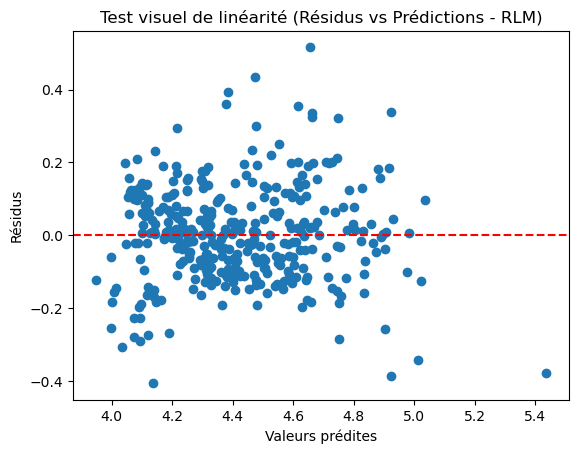


üìä VIF - Facteurs d'inflation de la variance
                  Variable        VIF
0                    const  92.851693
1                    PM2.5   2.277162
2                       CO   4.442861
3                      SO2   4.802352
4                       O3   1.500061
5                 TEMP_MOY   2.239586
6        WINDSPEED_AVG_KMH   1.746261
7      PRECIP_TOTAL_DAY_MM   1.337931
8   CLOUDCOVER_AVG_PERCENT   1.636035
9                    month   1.637105
10                 weekday   1.016229

üìä Ind√©pendance des erreurs - Durbin-Watson
Durbin-Watson statistic : 1.293 (id√©al proche de 2)


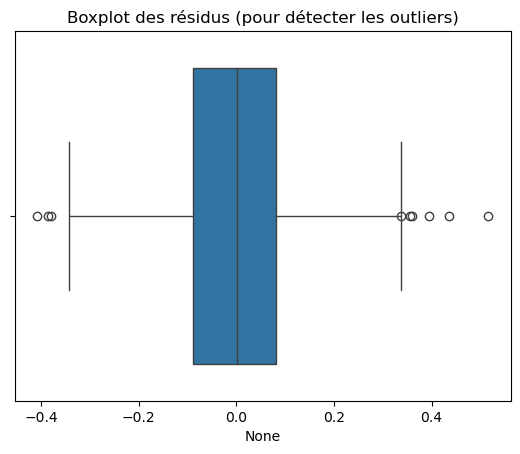

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson

def verifier_rlm_robuste(X, y):
    # Ajout de la constante
    X_const = sm.add_constant(X)
    
    # Estimation du mod√®le RLM avec norme de Huber
    model_rlm = sm.RLM(y, X_const, M=sm.robust.norms.HuberT())
    results_rlm = model_rlm.fit()

    # R√©sum√©
    print("\n‚úÖ R√âSUM√â DU MOD√àLE ROBUSTE (RLM - Huber)")
    print(results_rlm.summary())
    
    # 1. Graphique R√©sidus vs Pr√©dictions (lin√©arit√©)
    plt.figure()
    plt.scatter(results_rlm.fittedvalues, results_rlm.resid)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Valeurs pr√©dites")
    plt.ylabel("R√©sidus")
    plt.title("Test visuel de lin√©arit√© (R√©sidus vs Pr√©dictions - RLM)")
    plt.show()

    # 2. VIF - Multicolin√©arit√©
    print("\nüìä VIF - Facteurs d'inflation de la variance")
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X_const.columns
    vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
    print(vif_data)

    # 3. Durbin-Watson (Ind√©pendance des erreurs)
    print("\nüìä Ind√©pendance des erreurs - Durbin-Watson")
    dw_stat = durbin_watson(results_rlm.resid)
    print(f"Durbin-Watson statistic : {dw_stat:.3f} (id√©al proche de 2)")

    # 4. Boxplot des r√©sidus (d√©tection d‚Äôoutliers)
    plt.figure()
    sns.boxplot(x=results_rlm.resid)
    plt.title("Boxplot des r√©sidus (pour d√©tecter les outliers)")
    plt.show()

    return results_rlm
verifier_rlm_robuste(X, y)

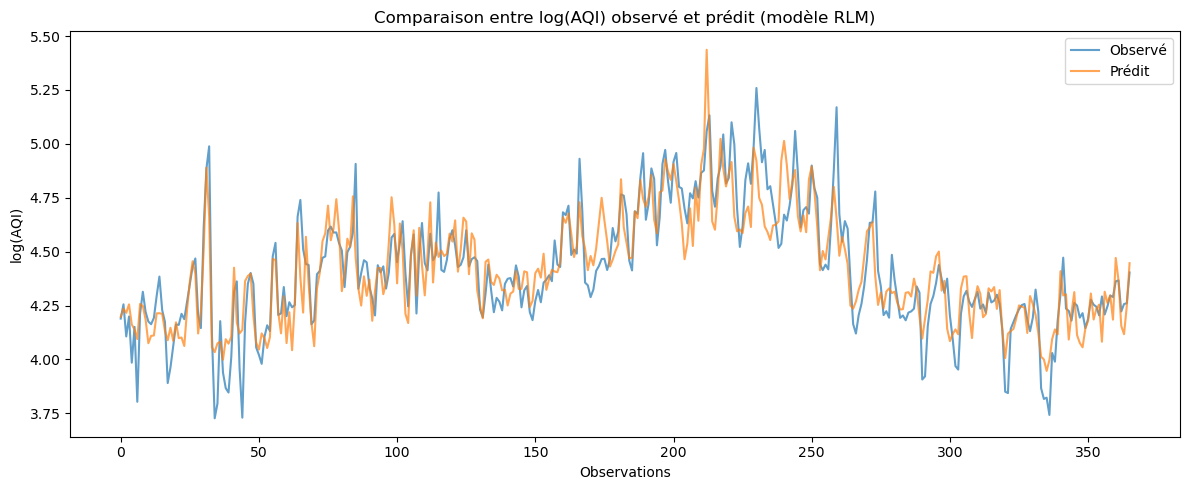

In [30]:
# Pr√©dictions du mod√®le RLM
y_pred = model_rlm.fittedvalues
y_true = y

# Cr√©er un DataFrame pour tracer les courbes
comparison_df = pd.DataFrame({
    'log_AQI_observ√©': y_true,
    'log_AQI_pr√©dit': y_pred
})

# Tracer les courbes
plt.figure(figsize=(12, 5))
plt.plot(comparison_df['log_AQI_observ√©'].values, label='Observ√©', alpha=0.7)
plt.plot(comparison_df['log_AQI_pr√©dit'].values, label='Pr√©dit', alpha=0.7)
plt.title("Comparaison entre log(AQI) observ√© et pr√©dit (mod√®le RLM)")
plt.xlabel("Observations")
plt.ylabel("log(AQI)")
plt.legend()
plt.tight_layout()
plt.show()
